In [1]:
!python --version

Python 3.8.17


In [2]:
import pandas as pd
import warnings
import re

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r'/kaggle/input/final-datathon/Datathon_TrainData_org.csv')

In [5]:
summary=df.info()
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1614 non-null   object
 1   Date                  1614 non-null   object
 2   Speaker               1613 non-null   object
 3   Headline              1612 non-null   object
 4   Text_of_Speech        1611 non-null   object
 5   Designation           1605 non-null   object
 6   Running President/PM  1605 non-null   object
 7   Speech Link           1605 non-null   object
 8   Emotion               1605 non-null   object
 9   Context               1605 non-null   object
dtypes: object(10)
memory usage: 126.5+ KB
None


# dropping unwanted rows

In [6]:
df = df.drop(columns=['Country', 'Date','Speaker','Headline','Running President/PM','Designation','Speech Link','Context'])

In [7]:
df

,Text_of_Speech,Emotion
0,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",UPSET
1,"THE PRESIDENT: Good evening, my fellow Americ...",OPTIMISM
2,"Good afternoon, dear colleagues,\n\nOur meetin...",NEUTRAL
3,"Good afternoon, everybody. This sound system i...",NEUTRAL
4,More Americans voted in the 2020 elections tha...,UPSET
...,...,...
1612,Good afternoon I have just been to see Her Maj...,OPTIMISM
1613,"This February, during Black History Month, I c...",OPTIMISM
1614,Thank you so much. Everybody have a seat. We...,NEUTRAL
1615,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",JOY


# checking null count in each column in df

In [8]:
null_counts = df.isnull().sum()
print("Null counts for each column:")
print(null_counts)

Null counts for each column:
Text_of_Speech     6
Emotion           12
dtype: int64


# labels cleaning

In [9]:
df['Emotion'].isnull().sum()

12

In [10]:
labels=df['Emotion'].unique()

In [11]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY', nan], dtype=object)

In [12]:
df= df.dropna(subset=['Emotion'])

In [13]:
labels=df['Emotion'].unique()

In [14]:
labels

array(['UPSET', 'OPTIMISM', 'NEUTRAL', 'JOY'], dtype=object)

In [15]:
df['Emotion'].isnull().sum()

0

# encode labels

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()
df['Emotion'] = label_encoder.fit_transform(df['Emotion'])

In [18]:
df

,Text_of_Speech,Emotion
0,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",3
1,"THE PRESIDENT: Good evening, my fellow Americ...",2
2,"Good afternoon, dear colleagues,\n\nOur meetin...",1
3,"Good afternoon, everybody. This sound system i...",1
4,More Americans voted in the 2020 elections tha...,3
...,...,...
1612,Good afternoon I have just been to see Her Maj...,2
1613,"This February, during Black History Month, I c...",2
1614,Thank you so much. Everybody have a seat. We...,1
1615,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",0


# text null values

In [19]:
df[df['Text_of_Speech']=="NaN"].isnull().sum()

Text_of_Speech    0.0
Emotion           0.0
dtype: float64

In [21]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.5 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


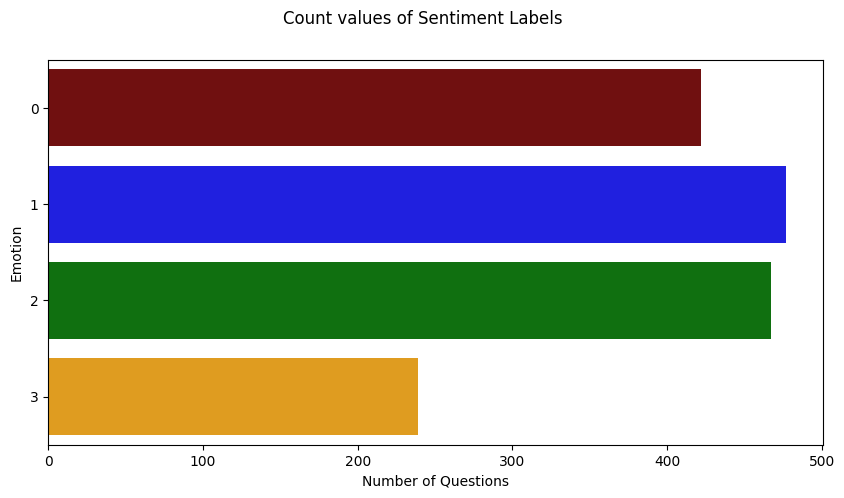

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import countplot
from matplotlib.pyplot import suptitle
%matplotlib inline
# Create the count plot
plt.figure(figsize=(10, 5))
sns.countplot(y="Emotion", palette=['maroon', 'blue', 'green', 'orange'], data=df)
plt.suptitle("Count values of Sentiment Labels")
plt.xlabel("Number of Questions")
plt.show()

# preprocessing of Text_of_Speech

# convert to lower

In [23]:
def lower(x):
    return x.lower()
df['Text_of_Speech']=df['Text_of_Speech'].apply(lower)    

In [24]:
df

,Text_of_Speech,Emotion
0,"esteemed mr lebedev,\n\nladies and gentlemen:\...",3
1,"the president: good evening, my fellow americ...",2
2,"good afternoon, dear colleagues,\n\nour meetin...",1
3,"good afternoon, everybody. this sound system i...",1
4,more americans voted in the 2020 elections tha...,3
...,...,...
1612,good afternoon i have just been to see her maj...,2
1613,"this february, during black history month, i c...",2
1614,thank you so much. everybody have a seat. we...,1
1615,"colleagues,\nfriends,\n\nin 2013, president xi...",0


# replace emojis with words if present

In [27]:
# from emot.emo_unicode import UNICODE_EMOJI
# # Function for converting emojis into word
# def convert_emojis(text):
#     for emot in UNICODE_EMOJI:
#         text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
#     return text  
# df['Text_of_Speech'] = df['Text_of_Speech'].apply(convert_emojis)

In [28]:
# df

# tokenize

In [32]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 16.7 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
import nltk
from nltk.tokenize import word_tokenize
def tokenize(x):
    return word_tokenize(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(tokenize)

In [36]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ,, ladies, and, gentle...",3
1,"[the, president, :, good, evening, ,, my, fell...",2
2,"[good, afternoon, ,, dear, colleagues, ,, our,...",1
3,"[good, afternoon, ,, everybody, ., this, sound...",1
4,"[more, americans, voted, in, the, 2020, electi...",3
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",2
1613,"[this, february, ,, during, black, history, mo...",2
1614,"[thank, you, so, much, ., everybody, have, a, ...",1
1615,"[colleagues, ,, friends, ,, in, 2013, ,, presi...",0


# remove punctuations

In [37]:
def remove_punct(x):
    import string
    punct_tag=set(string.punctuation)
    t=[i for i in x if i not in punct_tag]
    return t
      
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_punct)

In [38]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, and, gentlemen...",3
1,"[the, president, good, evening, my, fellow, am...",2
2,"[good, afternoon, dear, colleagues, our, meeti...",1
3,"[good, afternoon, everybody, this, sound, syst...",1
4,"[more, americans, voted, in, the, 2020, electi...",3
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",2
1613,"[this, february, during, black, history, month...",2
1614,"[thank, you, so, much, everybody, have, a, sea...",1
1615,"[colleagues, friends, in, 2013, president, xi,...",0


# remove extra white spaces

In [39]:
def whites(x):
    w={' '}
    x=[i for i in x if i not in w]
    return x
df['Text_of_Speech']=df['Text_of_Speech'].apply(whites)    

In [40]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, and, gentlemen...",3
1,"[the, president, good, evening, my, fellow, am...",2
2,"[good, afternoon, dear, colleagues, our, meeti...",1
3,"[good, afternoon, everybody, this, sound, syst...",1
4,"[more, americans, voted, in, the, 2020, electi...",3
...,...,...
1612,"[good, afternoon, i, have, just, been, to, see...",2
1613,"[this, february, during, black, history, month...",2
1614,"[thank, you, so, much, everybody, have, a, sea...",1
1615,"[colleagues, friends, in, 2013, president, xi,...",0


# stopwords

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
from nltk.corpus import stopwords
import nltk
def re_stop(x):
    nltk_stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in x if token not in nltk_stopwords]
df['Text_of_Speech']=df['Text_of_Speech'].apply(re_stop)  

In [45]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, gentlemen, gat...",3
1,"[president, good, evening, fellow, americans, ...",2
2,"[good, afternoon, dear, colleagues, meeting, t...",1
3,"[good, afternoon, everybody, sound, system, re...",1
4,"[americans, voted, 2020, elections, election, ...",3
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",2
1613,"[february, black, history, month, call, americ...",2
1614,"[thank, much, everybody, seat, well, welcome, ...",1
1615,"[colleagues, friends, 2013, president, xi, jin...",0


# Removes Numbers

In [46]:
def remove_num(data):
    data=' '.join(data)
    tag=re.compile(r'[0-9]+')
    data=tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_num) 

In [47]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev ladies gentlemen gathered ...,3
1,president good evening fellow americans want t...,2
2,good afternoon dear colleagues meeting today d...,1
3,good afternoon everybody sound system really p...,1
4,americans voted elections election nation ’ ...,3
...,...,...
1612,good afternoon see majesty queen invited form ...,2
1613,february black history month call american peo...,2
1614,thank much everybody seat well welcome white h...,1
1615,colleagues friends president xi jinping prop...,0


# remove roamns if present

In [48]:
def remove_roman(data):
    en_tag =re.compile(r'^M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$')
    data=en_tag.sub(r' ',data)
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_roman)

In [49]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev ladies gentlemen gathered ...,3
1,president good evening fellow americans want t...,2
2,good afternoon dear colleagues meeting today d...,1
3,good afternoon everybody sound system really p...,1
4,americans voted elections election nation ’ ...,3
...,...,...
1612,good afternoon see majesty queen invited form ...,2
1613,february black history month call american peo...,2
1614,thank much everybody seat well welcome white h...,1
1615,colleagues friends president xi jinping prop...,0


# Remove redundant words

In [50]:
def remove_redun(data):
    red_tag=re.compile(r'[?<=(  )\\]|[&&|\|\|-]')
    data=red_tag.sub(r' ',data)
    data=data.split(" ")
    return data
df['Text_of_Speech']=df['Text_of_Speech'].apply(remove_redun)

In [51]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, ladies, gentlemen, gat...",3
1,"[president, good, evening, fellow, americans, ...",2
2,"[good, afternoon, dear, colleagues, meeting, t...",1
3,"[good, afternoon, everybody, sound, system, re...",1
4,"[americans, voted, , , elections, election, na...",3
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",2
1613,"[february, black, history, month, call, americ...",2
1614,"[thank, much, everybody, seat, well, welcome, ...",1
1615,"[colleagues, friends, , , president, xi, jinpi...",0


# stemming

In [52]:
# from nltk.stem.porter import PorterStemmer
# def stemm(x):
#     l=[]
#     for i in x:
#         l.append(PorterStemmer().stem(i))
#     return l    
# df['Text_of_Speech']=df['Text_of_Speech'].apply(stemm)  

In [53]:
# df

# lemmatiazation

technique that reduces words to their base or dictionary form, ensuring variants of a word are transformed to a common root. 

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [56]:
from nltk.stem import WordNetLemmatizer
def lemm(x):
    l=[]
    for i in x:
        l.append(WordNetLemmatizer().lemmatize(i))
    return l    
df['Text_of_Speech']=df['Text_of_Speech'].apply(lemm)

In [57]:
df

,Text_of_Speech,Emotion
0,"[esteemed, mr, lebedev, lady, gentleman, gathe...",3
1,"[president, good, evening, fellow, american, w...",2
2,"[good, afternoon, dear, colleague, meeting, to...",1
3,"[good, afternoon, everybody, sound, system, re...",1
4,"[american, voted, , , election, election, nati...",3
...,...,...
1612,"[good, afternoon, see, majesty, queen, invited...",2
1613,"[february, black, history, month, call, americ...",2
1614,"[thank, much, everybody, seat, well, welcome, ...",1
1615,"[colleague, friend, , , president, xi, jinping...",0


# combine again to speech

In [58]:
def combine(x):
    return ' '.join(x)
df['Text_of_Speech']=df['Text_of_Speech'].apply(combine)

In [59]:
df

,Text_of_Speech,Emotion
0,esteemed mr lebedev lady gentleman gathered su...,3
1,president good evening fellow american want ta...,2
2,good afternoon dear colleague meeting today de...,1
3,good afternoon everybody sound system really p...,1
4,american voted election election nation ’ hi...,3
...,...,...
1612,good afternoon see majesty queen invited form ...,2
1613,february black history month call american peo...,2
1614,thank much everybody seat well welcome white h...,1
1615,colleague friend president xi jinping propos...,0


# word2vec

In [61]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
X=df['Text_of_Speech']
Y=df['Emotion']
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train_vect_avg = []
X_test_vect_avg = []
filename = r"/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"
model_g = KeyedVectors.load_word2vec_format(filename, binary=True)
words = set(model_g.index_to_key)
X_train_vect = np.array(
    [np.array([model_g[i] for i in ls if i in words]) for ls in X_train]
)
X_test_vect = np.array(
    [np.array([model_g[i] for i in ls if i in words]) for ls in X_test]
)
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(300, dtype=float))
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(300, dtype=float))
X_train_vtc = X_train_vect_avg
X_test_vtc = X_test_vect_avg
y_train = y_train.values.ravel()
X_train = X_train_vect_avg
X_test = X_test_vect_avg

In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode the emotion labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Determine SEQUENCE_LENGTH and EMBEDDING_DIM based on input data
SEQUENCE_LENGTH = X_train_pad.shape[1]  # Use the actual sequence length
EMBEDDING_DIM = X_train_pad.shape[2]    # Use the actual embedding dimension

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, EMBEDDING_DIM)))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
classification_rep = classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_)
print(classification_rep)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1284, 128)         117248    
                                                                 
 dropout_6 (Dropout)         (None, 1284, 128)         0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 249,348
Trainable params: 249,348
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 1284, 100), found shape=(None, 100)


In [73]:
from tensorflow.keras.utils import to_categorical

# One-hot encode your emotion labels (y_train and y_test)
y_train_one_hot = to_categorical(df['Emotion'], num_classes=4)

In [74]:
# Train the model (X_train and y_train should be prepared as described earlier)
model.fit(df['Text_of_Speech'], y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model (X_test and y_test should be prepared as described earlier)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'sequential_1/Cast' defined at (most recent call last):
    File "/usr/local/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/local/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/local/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/local/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/usr/local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/usr/local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/usr/local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_15/1219462725.py", line 2, in <module>
      model.fit(df['Text_of_Speech'], y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)
    File "/usr/local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/functional.py", line 651, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "/usr/local/lib/python3.8/site-packages/keras/engine/functional.py", line 748, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential_1/Cast'
Cast string to float is not supported
	 [[{{node sequential_1/Cast}}]] [Op:__inference_train_function_12375]

# glove

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X=df['Text_of_Speech']
glove={}
total_vocabulary = set(word for text in X for word in text)
with open(r"/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.100d.txt", "rb") as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode("utf-8")
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

class W2vVectorizer(object):
    def __init__(self, w2v):
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])

    def fit(self, X, Y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.w2v[w] for w in words if w in self.w2v] or [np.zeros(self.dimensions)],axis=0,) for words in X])

vectorizer = W2vVectorizer(glove)
X_glove = vectorizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_glove,df['Emotion'], test_size=0.2)
X_train_vtc = X_train
X_test_vtc = X_test

In [211]:
from sklearn.linear_model import LogisticRegression
model_l=LogisticRegression().fit(X_train,y_train)
y_pred=model_l.predict(X_test)
score=classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.53      0.42      0.47        92
           1       0.37      0.56      0.44        96
           2       0.37      0.44      0.40        85
           3       0.00      0.00      0.00        48

    accuracy                           0.40       321
   macro avg       0.32      0.36      0.33       321
weighted avg       0.36      0.40      0.37       321



In [212]:
from sklearn.svm import SVC
rf_kn =SVC()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.00      0.00      0.00        96
           2       0.26      1.00      0.42        85
           3       0.00      0.00      0.00        48

    accuracy                           0.26       321
   macro avg       0.07      0.25      0.10       321
weighted avg       0.07      0.26      0.11       321



In [213]:
from sklearn.tree import DecisionTreeClassifier
rf_kn = DecisionTreeClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

           0       0.44      0.34      0.38        92
           1       0.35      0.34      0.35        96
           2       0.33      0.44      0.37        85
           3       0.29      0.25      0.27        48

    accuracy                           0.35       321
   macro avg       0.35      0.34      0.34       321
weighted avg       0.36      0.35      0.35       321



In [214]:
from sklearn.ensemble import RandomForestClassifier
rf_kn = RandomForestClassifier()
rf_model_kn = rf_kn.fit(X_train, y_train)
y_pred = rf_model_kn.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

           0       0.54      0.43      0.48        92
           1       0.34      0.45      0.39        96
           2       0.32      0.41      0.36        85
           3       0.18      0.04      0.07        48

    accuracy                           0.37       321
   macro avg       0.35      0.33      0.32       321
weighted avg       0.37      0.37      0.36       321



In [215]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score1=classification_report(y_test, y_pred)
print(score1)

              precision    recall  f1-score   support

           0       0.43      0.39      0.41        92
           1       0.35      0.41      0.38        96
           2       0.39      0.33      0.36        85
           3       0.20      0.23      0.21        48

    accuracy                           0.36       321
   macro avg       0.34      0.34      0.34       321
weighted avg       0.36      0.36      0.36       321



In [217]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

estimator_list = [
        ("knn", KNeighborsClassifier()),
        ("svm_rbf", SVC()),
        ("dt", DecisionTreeClassifier()),
        ("rf", RandomForestClassifier()),
        ("mlp", MLPClassifier(alpha=1, max_iter=1000)),
    ]
stack_model = StackingClassifier(
        estimators=estimator_list, final_estimator=LogisticRegression()
    )
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
score = classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.51      0.46      0.48        92
           1       0.34      0.36      0.35        96
           2       0.32      0.45      0.37        85
           3       0.18      0.06      0.09        48

    accuracy                           0.37       321
   macro avg       0.34      0.33      0.32       321
weighted avg       0.36      0.37      0.36       321



In [216]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="multi:softmax", num_class=4,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)
score1=classification_report(y_test,y_pred.round())
print(score1)

              precision    recall  f1-score   support

           0       0.49      0.46      0.47        92
           1       0.34      0.42      0.38        96
           2       0.31      0.34      0.32        85
           3       0.22      0.10      0.14        48

    accuracy                           0.36       321
   macro avg       0.34      0.33      0.33       321
weighted avg       0.36      0.36      0.35       321

